# Linear Regression Assignment

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
# Loading the file to df
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#converting season to category variable
df['season']=df['season'].apply(lambda x : {1:'spring',2:'summer',3:'fall',4:'winter'}.get(x))

In [7]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [8]:
#converting weathersit to category varaibles
df['weathersit'] = df['weathersit'].apply(lambda x : {1:'clear',2:'mist',3:'light',4:'heavy'}.get(x))

In [9]:
df.weathersit.value_counts()

clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [10]:
#converting 'mnth' to catgeory varaibles
df['mnth'] = df['mnth'].apply(lambda x : {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}.get(x))

In [11]:
df.mnth.value_counts()

dec    62
mar    62
aug    62
may    62
jan    62
oct    62
jul    62
nov    60
apr    60
sep    60
jun    60
feb    56
Name: mnth, dtype: int64

In [12]:
#converting 'weekday' to catgeory varaibles
df['weekday'] = df['weekday'].apply(lambda x : {0:'Mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}.get(x))

In [13]:
df.weekday.value_counts()

tue    105
wed    105
thu    104
fri    104
sun    104
sat    104
Mon    104
Name: weekday, dtype: int64

In [14]:
# Dropping 'dteday' as we already have 'yr' & 'mnth' , 'instant' as it's record index 
df.drop(columns=['dteday','instant'],axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,tue,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,wed,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,thu,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,fri,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,sat,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## visualization

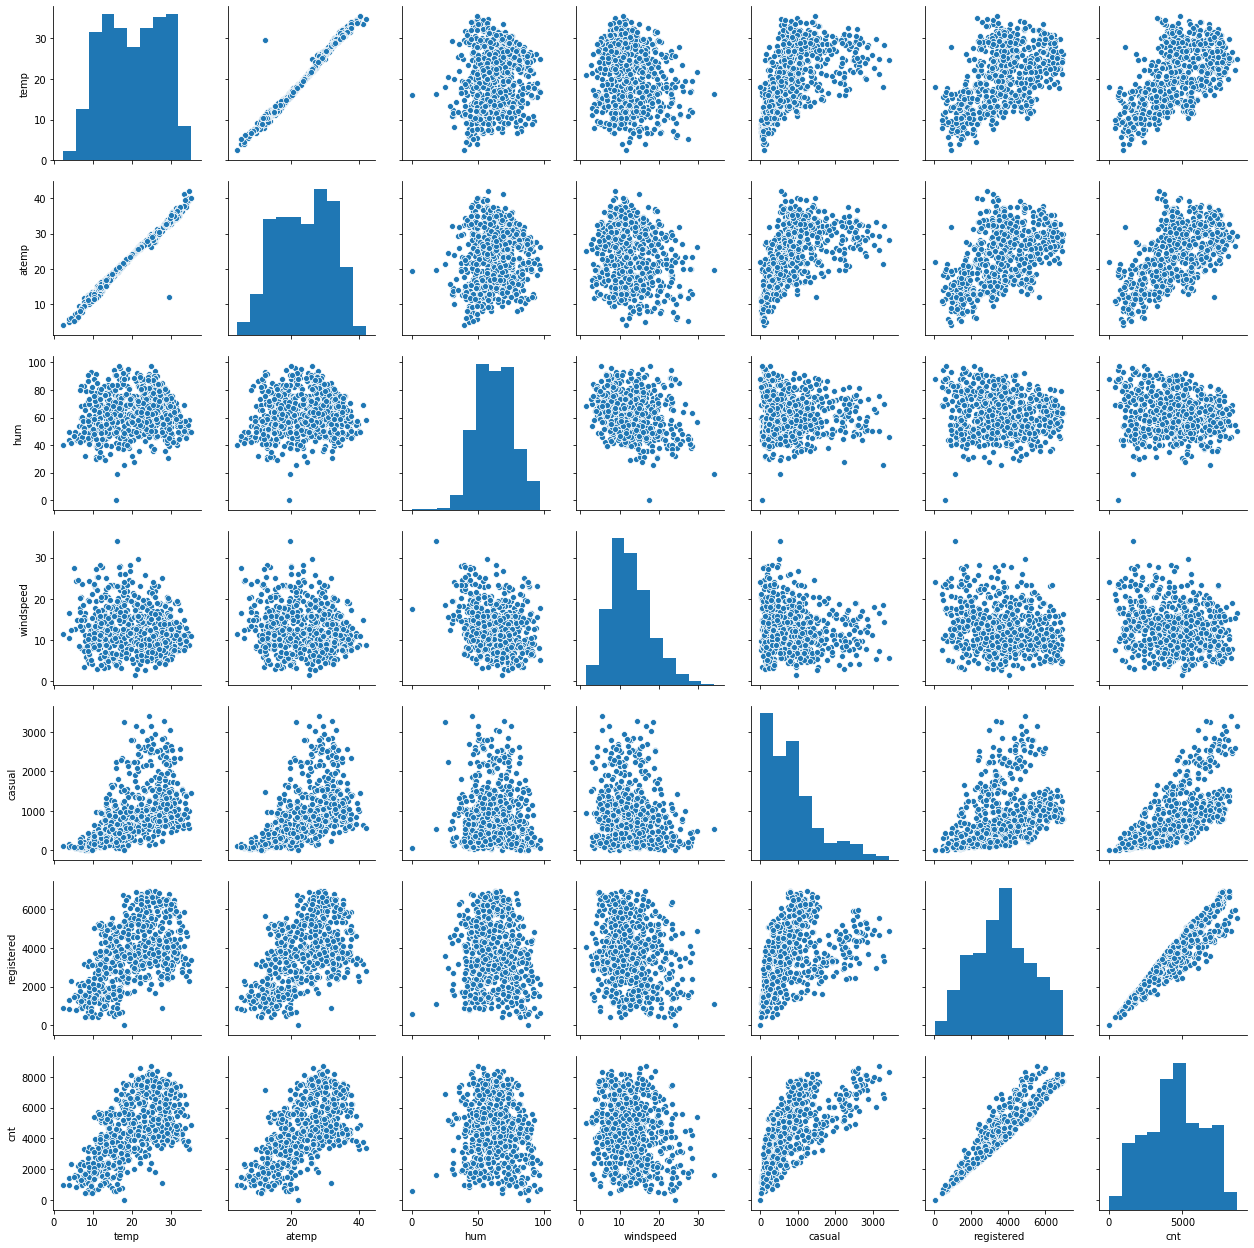

In [18]:
# checking the distributions of columns and transforming them as needed
numvar = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(df[numvar])
plt.show()

'temp' and 'atemp' seems to have a good correlation

In [19]:
#cheking correlation
df[numvar].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


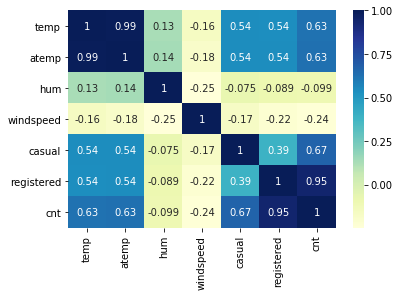

In [20]:
ax = sns.heatmap(df[numvar].corr(),annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim( bottom+0.5,top-0.5)
plt.show()

In [21]:
#dropping 'atemp' as it's highly correlated to 'temp'. Also dropping 'casual','registered' as the 'cnt' is sum of these two and they can't be used as independent variables for linear model
df.drop(columns=['atemp','casual','registered'], axis=1,inplace=True)

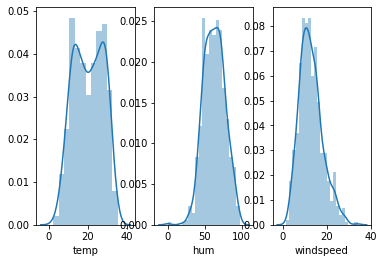

In [22]:
#visualizing the numeric variables to check if they are normally distributed
numvar = ['temp','hum','windspeed']
plt.subplot(1,3,1)
sns.distplot(df['temp'])
plt.subplot(1,3,2)
sns.distplot(df['hum'])
plt.subplot(1,3,3)
sns.distplot(df['windspeed'])
plt.show()

'hum' is left skewed while the 'windspeed' is right skewed. Therefore transforming them using power transformer.
'temp' is not skewed but can be classified.

In [23]:
#pt = PowerTransformer()
#df['t_hum'] = pt.fit_transform(df[['hum']])
#df['t_windspeed'] = pt.fit_transform(df[['windspeed']])

In [24]:
#plt.subplot(1,2,1)
#sns.distplot(df['t_hum'])
#plt.subplot(1,2,2)
#sns.distplot(df['t_windspeed'])
#plt.show()

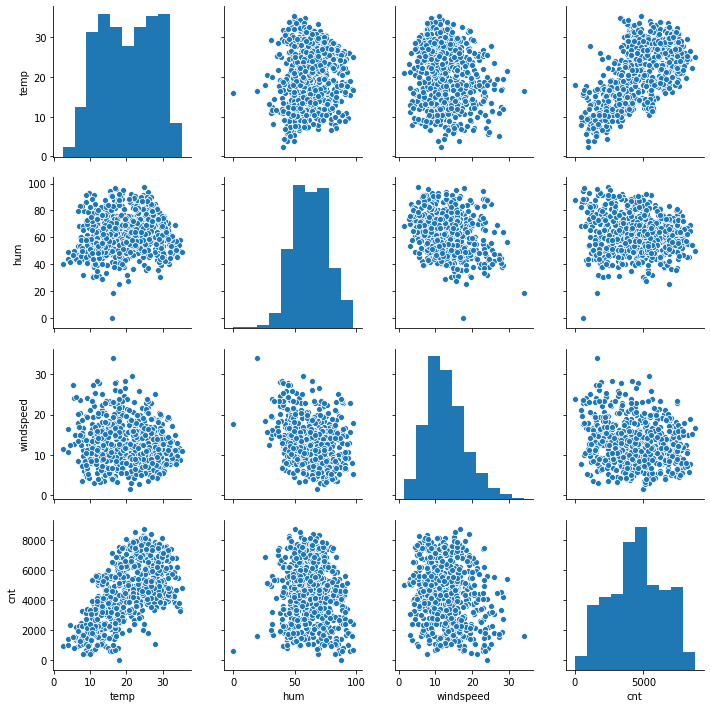

In [25]:
#Visualizing the numerical variables using pair plot
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

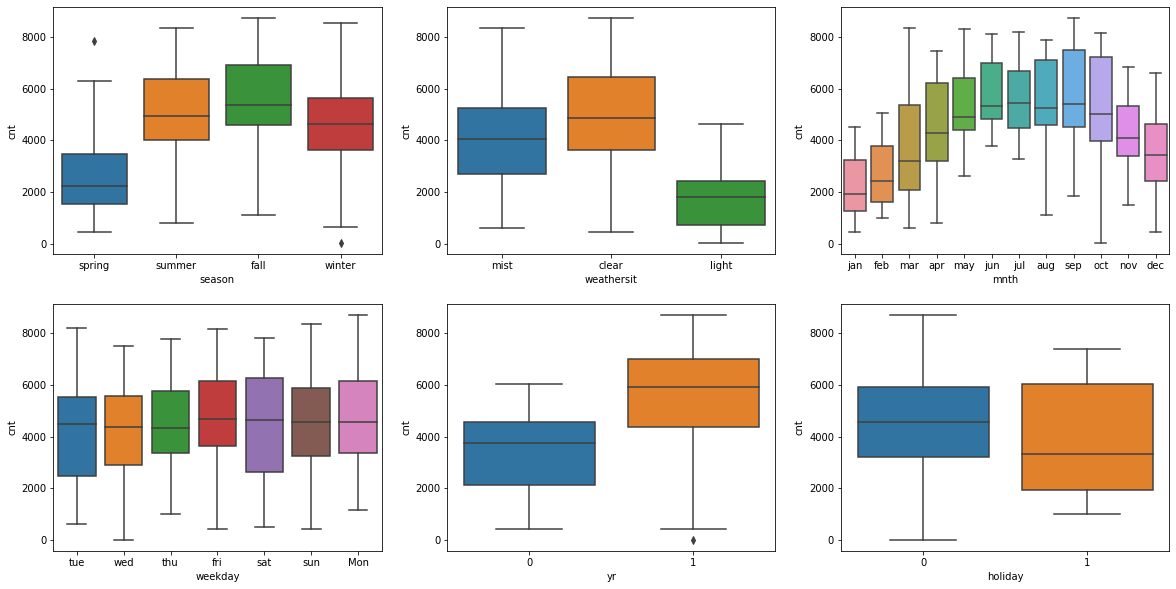

In [26]:
#visualizing categorical data using box plots 
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

## Modelling

In [27]:
#creating dummy variables for 'season' and 'weathersit'
seasons = pd.get_dummies(df['season'],drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
weathers = pd.get_dummies(df['weathersit'],drop_first=True)
weathers.head()

,light,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [29]:
week = pd.get_dummies(df['weekday'],drop_first=True)
week.head()

,fri,sat,sun,thu,tue,wed
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [30]:
month = pd.get_dummies(df['mnth'],drop_first=True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
df = pd.concat([df,seasons,weathers,week,month],axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,spring,0,jan,0,tue,1,mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,wed,1,mist,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,thu,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,fri,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,sat,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [32]:
#dropping 'season' and 'weathersit'
df.drop(columns=['season','weathersit','weekday','mnth'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
spring        730 non-null uint8
summer        730 non-null uint8
winter        730 non-null uint8
light         730 non-null uint8
mist          730 non-null uint8
fri           730 non-null uint8
sat           730 non-null uint8
sun           730 non-null uint8
thu           730 non-null uint8
tue           730 non-null uint8
wed           730 non-null uint8
aug           730 non-null uint8
dec           730 non-null uint8
feb           730 non-null uint8
jan           730 non-null uint8
jul           730 non-null uint8
jun           730 non-null uint8
mar           730 non-null uint8
may           730 non-null uint8
nov           730 non-null uint

In [34]:
#splitting train and test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 50)

In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
707,1,0,1,15.750847,90.5417,10.584325,3228,0,0,1,...,1,0,0,0,0,0,0,0,0,0
172,0,0,1,30.066653,70.7500,11.541554,4507,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,1,9.566653,49.8750,10.583521,1248,1,0,0,...,0,0,1,0,0,0,0,0,0,0
204,0,0,1,34.030000,55.0833,11.334457,3606,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182,0,0,1,30.271653,44.4583,7.709154,5119,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
#scaling the numeric varaibles using min-max scaling
scaler = MinMaxScaler()
df_train[['temp','hum','windspeed','cnt']] = scaler.fit_transform(df_train[['temp','hum','windspeed','cnt']])

In [37]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.094118,0.076471,0.074510,0.078431,0.082353,0.094118,0.100000,0.086275,0.086275,0.064706
std,0.500179,0.151726,0.459559,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.292279,0.266010,0.262857,0.269113,0.275172,0.292279,0.300295,0.281045,0.281045,0.246248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
y_train = df_train.pop('cnt')
#df_train.pop('hum')
#df_train.pop('windspeed')
X_train = df_train

In [39]:
X_train.shape

(510, 28)

In [40]:
#adding constant to X_train to set linear model
X_train_lm = sm.add_constant(X_train)
X_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
707,1.0,1,0,1,0.417140,0.933018,0.243629,0,0,1,...,1,0,0,0,0,0,0,0,0,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,1.0,0,0,1,0.223565,0.513954,0.243603,1,0,0,...,0,0,1,0,0,0,0,0,0,0
204,1.0,0,0,1,0.989306,0.567625,0.267859,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182,1.0,0,0,1,0.871664,0.458136,0.150755,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
#setting a linear model using stats
lm = sm.OLS(y_train,X_train_lm).fit()
lm.params

const         0.383047
yr            0.232768
holiday      -0.128894
workingday   -0.099416
temp          0.441119
hum          -0.201396
windspeed    -0.187316
spring       -0.064280
summer        0.025879
winter        0.122197
light        -0.207229
mist         -0.047443
fri           0.081895
sat           0.087194
sun          -0.013381
thu           0.067064
tue           0.064349
wed           0.052057
aug           0.000912
dec          -0.070046
feb          -0.035979
jan          -0.059232
jul          -0.022089
jun           0.020882
mar          -0.001517
may           0.027949
nov          -0.073828
oct          -0.014249
sep           0.063373
dtype: float64

In [42]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.29e-182
Time:                        12:27:10   Log-Likelihood:                 534.58
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     481   BIC:                            -888.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3830      0.045      8.568      0.000       0.295       0.471
yr             0.2328      0.008     29.258      0.000       0.217       0.248
holiday       -0.1289      0.064     -2.020      0.044      -0.254      -0.003
workingday    -0.0994      0.070     -1.419      0.157      -0.237       0.038
temp           0.4411      0.046      9.585      0.000       0.351       0.532
hum           -0.2014      0.039     -5.230      0.000      -0.277      -0.126
windspeed     -0.1873      0.026     -7.289      0.000      -0.238      -0.137
spring        -0.0643      0.030     -2.140      0.033      -0.123      -0.005
summer         0.0259      0.025      1.034      0.302      -0.023       0.075
winter         0.1222      0.030      4.131      0.000       0.064       0.180
light         -0.2072      0.026     -8.069      0.000      -0.258      -0.157
mist          -0.0474      0.011     -4.459      0.000      -0.068      -0.027
fri            0.0819      0.071      1.159      0.247      -0.057       0.221
sat            0.0872      0.071      1.230      0.219      -0.052       0.226
sun           -0.0134      0.015     -0.910      0.363      -0.042       0.016
thu            0.0671      0.070      0.959      0.338      -0.070       0.204
tue            0.0643      0.071      0.909      0.364      -0.075       0.203
wed            0.0521      0.070      0.740      0.460      -0.086       0.190
aug            0.0009      0.033      0.028      0.978      -0.064       0.066
dec           -0.0700      0.034     -2.038      0.042      -0.138      -0.003
feb           -0.0360      0.033     -1.085      0.279      -0.101       0.029
jan           -0.0592      0.035     -1.702      0.089      -0.128       0.009
jul           -0.0221      0.034     -0.649      0.517      -0.089       0.045
jun            0.0209      0.024      0.863      0.388      -0.027       0.068
mar           -0.0015      0.026     -0.059      0.953      -0.052       0.049
may            0.0279      0.020      1.390      0.165      -0.012       0.067
nov           -0.0738      0.037     -1.989      0.047      -0.147      -0.001
oct           -0.0142      0.036     -0.397      0.692      -0.085       0.056
sep            0.0634      0.032      1.995      0.047       0.001       0.126
==============================================================================
Omnibus:                       86.672   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.174
Skew:                          -0.814   Prob(JB):                     7.81e-55
Kurtosis:                       6.013   Cond. No.                         82.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [43]:
#using RFE to getting significant variables for the model
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,14)
rfe = rfe.fit(X_train,y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light', True, 1),
 ('mist', False, 4),
 ('fri', True, 1),
 ('sat', True, 1),
 ('sun', False, 13),
 ('thu', True, 1),
 ('tue', True, 1),
 ('wed', False, 2),
 ('aug', False, 15),
 ('dec', False, 6),
 ('feb', False, 9),
 ('jan', False, 7),
 ('jul', False, 8),
 ('jun', False, 11),
 ('mar', False, 14),
 ('may', False, 10),
 ('nov', False, 5),
 ('oct', False, 12),
 ('sep', True, 1)]

In [45]:
# creating new X_train for columns selected using RFE  
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [46]:
# creating new model using RFE columns
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.11e-188
Time:                        12:27:10   Log-Likelihood:                 512.37
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     495   BIC:                            -931.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2793      0.025     10.967      0.000       0.229       0.329
yr             0.2273      0.008     28.274      0.000       0.212       0.243
holiday       -0.0892      0.028     -3.154      0.002      -0.145      -0.034
workingday    -0.0340      0.013     -2.645      0.008      -0.059      -0.009
temp           0.6133      0.019     32.372      0.000       0.576       0.651
hum           -0.3100      0.030    -10.317      0.000      -0.369      -0.251
windspeed     -0.2062      0.026     -8.059      0.000      -0.256      -0.156
summer         0.0864      0.010      8.596      0.000       0.067       0.106
winter         0.1508      0.010     14.727      0.000       0.131       0.171
light         -0.1639      0.024     -6.725      0.000      -0.212      -0.116
fri            0.0265      0.015      1.805      0.072      -0.002       0.055
sat            0.0355      0.015      2.371      0.018       0.006       0.065
thu            0.0127      0.015      0.873      0.383      -0.016       0.041
tue            0.0140      0.015      0.934      0.351      -0.015       0.043
sep            0.0945      0.017      5.521      0.000       0.061       0.128
==============================================================================
Omnibus:                       61.410   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.850
Skew:                          -0.724   Prob(JB):                     3.13e-25
Kurtosis:                       4.793   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value is relatively low for all the independent variables, so they seem significant. Also the R-squared,0.84 seems good. 

In [47]:
#finding the VIF for the variables
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,10.58
3,temp,7.18
2,workingday,7.10
5,windspeed,3.67
11,thu,1.98
9,fri,1.97
10,sat,1.94
12,tue,1.94
0,yr,1.90
7,winter,1.63


hum has very high VIF. Therefore dropping the columns from the model

In [48]:
X_train_rfe.drop(columns=['hum'],axis=1,inplace=True)

In [49]:
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     161.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.62e-168
Time:                        12:27:10   Log-Likelihood:                 462.70
No. Observations:                 510   AIC:                            -897.4
Df Residuals:                     496   BIC:                            -838.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.018      4.375      0.000       0.044       0.116
yr             0.2347      0.009     26.614      0.000       0.217       0.252
holiday       -0.0838      0.031     -2.693      0.007      -0.145      -0.023
workingday    -0.0378      0.014     -2.676      0.008      -0.066      -0.010
temp           0.5881      0.021     28.427      0.000       0.547       0.629
windspeed     -0.1361      0.027     -5.009      0.000      -0.189      -0.083
summer         0.0807      0.011      7.303      0.000       0.059       0.102
winter         0.1351      0.011     12.114      0.000       0.113       0.157
light         -0.2384      0.026     -9.300      0.000      -0.289      -0.188
fri            0.0222      0.016      1.375      0.170      -0.010       0.054
sat            0.0394      0.016      2.393      0.017       0.007       0.072
thu            0.0084      0.016      0.523      0.601      -0.023       0.040
tue            0.0168      0.016      1.023      0.307      -0.016       0.049
sep            0.0665      0.019      3.574      0.000       0.030       0.103
==============================================================================
Omnibus:                       71.785   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.916
Skew:                          -0.842   Prob(JB):                     1.67e-28
Kurtosis:                       4.785   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,6.75
3,temp,4.32
4,windspeed,3.36
10,thu,1.98
8,fri,1.97
9,sat,1.94
11,tue,1.93
0,yr,1.89
5,summer,1.61
6,winter,1.39


In [51]:
#dropping 'workingday' as it has high VIF
X_train_rfe.drop(columns=['workingday'],axis=1,inplace=True)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.15e-168
Time:                        12:27:10   Log-Likelihood:                 459.04
No. Observations:                 510   AIC:                            -892.1
Df Residuals:                     497   BIC:                            -837.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0671      0.018      3.783      0.000       0.032       0.102
yr             0.2341      0.009     26.396      0.000       0.217       0.252
holiday       -0.0571      0.030     -1.926      0.055      -0.115       0.001
temp           0.5880      0.021     28.245      0.000       0.547       0.629
windspeed     -0.1359      0.027     -4.972      0.000      -0.190      -0.082
summer         0.0798      0.011      7.180      0.000       0.058       0.102
winter         0.1348      0.011     12.013      0.000       0.113       0.157
light         -0.2369      0.026     -9.187      0.000      -0.288      -0.186
fri           -0.0022      0.013     -0.164      0.870      -0.029       0.024
sat            0.0148      0.014      1.075      0.283      -0.012       0.042
thu           -0.0154      0.013     -1.151      0.250      -0.042       0.011
tue           -0.0079      0.014     -0.574      0.566      -0.035       0.019
sep            0.0695      0.019      3.720      0.000       0.033       0.106
==============================================================================
Omnibus:                       72.007   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.504
Skew:                          -0.819   Prob(JB):                     2.28e-30
Kurtosis:                       4.933   Cond. No.                         9.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.05
3,windspeed,3.24
0,yr,1.87
4,summer,1.61
5,winter,1.37
9,thu,1.35
7,fri,1.29
8,sat,1.29
10,tue,1.28
11,sep,1.16


In [53]:
#'fri','sat','thu','tue' has high p values. As they are not significant dropping the varaibles from model
X_train_rfe.drop(columns=['fri','sat','thu','tue'],axis=1,inplace=True)
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     257.4
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.72e-172
Time:                        12:27:10   Log-Likelihood:                 457.19
No. Observations:                 510   AIC:                            -896.4
Df Residuals:                     501   BIC:                            -858.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.017      3.884      0.000       0.033       0.100
yr             0.2338      0.009     26.380      0.000       0.216       0.251
holiday       -0.0634      0.029     -2.167      0.031      -0.121      -0.006
temp           0.5878      0.021     28.333      0.000       0.547       0.629
windspeed     -0.1365      0.027     -5.005      0.000      -0.190      -0.083
summer         0.0792      0.011      7.141      0.000       0.057       0.101
winter         0.1337      0.011     11.944      0.000       0.112       0.156
light         -0.2352      0.026     -9.142      0.000      -0.286      -0.185
sep            0.0682      0.019      3.656      0.000       0.032       0.105
==============================================================================
Omnibus:                       73.356   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.734
Skew:                          -0.826   Prob(JB):                     1.67e-31
Kurtosis:                       4.986   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.65
3,windspeed,3.10
0,yr,1.87
4,summer,1.60
5,winter,1.34
7,sep,1.16
6,light,1.07
1,holiday,1.03


All the VIFs are less than 5 which means that there is no/negligible mutli colinearity between these independent variables.The R squared is 0.8 which means the model is significant.

## Residual Analysis of train data

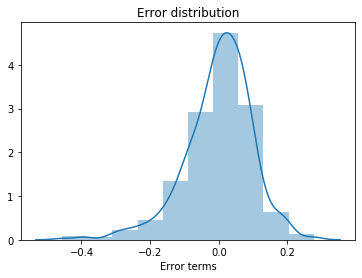

In [55]:
y_train_pred = lm.predict(X_train_lm)
err = y_train-y_train_pred
sns.distplot(err, bins=10)
plt.xlabel('Error terms')
plt.title('Error distribution')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

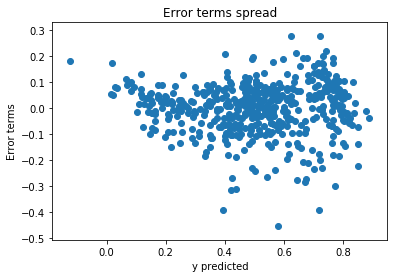

In [56]:
plt.scatter(y_train_pred,err)
plt.title("Error terms spread")
plt.xlabel('y predicted')
plt.ylabel('Error terms')
plt.show

The error terms are a little left skewed but looks aprroximately normal and there is no pattern in the error terms.

## Predictions using test data

In [57]:
# transforming the variables
df_test[["temp","hum","windspeed","cnt"]] = scaler.transform(df_test[["temp","hum","windspeed","cnt"]])

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test[X.columns]

In [59]:
X_test.head()

,yr,holiday,temp,windspeed,summer,winter,light,sep
333,0,0,0.341207,0.488582,0,1,0,0
203,0,0,1.013904,0.185727,0,0,0,0
279,0,0,0.579699,-0.049804,0,1,0,0
483,1,0,0.512322,0.154750,1,0,0,0
267,0,0,0.737981,0.010767,0,1,0,1


In [60]:
X_test_lm = sm.add_constant(X_test)

In [61]:
y_test_pred = lm.predict(X_test_lm)

## Evaluating the model

In [62]:
# R squared of the test model
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.766916496961844

The R squared is 0.76 which is close to the R squared obtained 0.8 from train data set. Therefore it can be inferred that model is performing good.

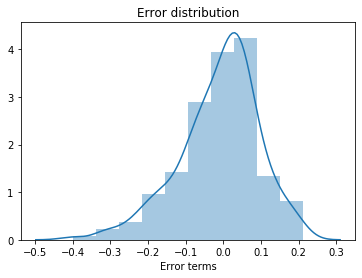

In [63]:
err = y_test - y_test_pred
sns.distplot(err,bins=10)
plt.xlabel('Error terms')
plt.title('Error distribution')
plt.show()

The error terms are normally distributed 

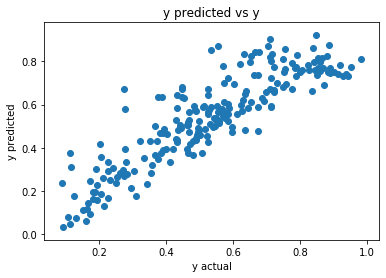

In [64]:
plt.scatter(y_test,y_test_pred)
plt.title('y predicted vs y')
plt.xlabel('y actual')
plt.ylabel('y predicted')
plt.show()

The predicted and the actual values of 'cnt' seems to follow same pattern.Therefore this model can be used to predict with a R-squared of 0.8

### Conclusion

The R squared of train data of the final model is 0.8 while that of the test data is 0.77. The demand of the bikes seems to increase with year, temperature, in winter and september.